## Workshop 3

## Kevin Joan Delgado Pérez A01706328

## 17/08/2022

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import pandas_datareader as pdr

INTEL = pdr.get_data_yahoo('INTC', start="01/01/2017", interval="m")

In [ ]:
INTEL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,38.450001,36.189999,36.610001,36.820000,456335100.0,31.593967
2017-02-01,36.950001,34.840000,36.820000,36.200001,477551300.0,31.061970
2017-03-01,36.299999,34.660000,35.849998,36.070000,546151800.0,31.171371
2017-04-01,37.500000,35.209999,36.189999,36.150002,444122200.0,31.240513
2017-05-01,37.169998,35.020000,36.110001,36.110001,432927300.0,31.205936
...,...,...,...,...,...,...
2022-05-01,46.639999,40.310001,43.720001,44.419998,773236800.0,43.631149
2022-06-01,44.930000,36.599998,44.770000,37.410000,783353000.0,37.036106
2022-07-01,40.730000,35.240002,37.090000,36.310001,792839800.0,35.947102


In [ ]:
AMD = pdr.get_data_yahoo('AMD', start="01/01/2017", interval="m")

In [ ]:
AMD

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,11.690000,9.420000,11.420000,10.370000,878890400,10.370000
2017-02-01,15.550000,10.810000,10.900000,14.460000,1571999700,14.460000
2017-03-01,15.090000,12.380000,15.080000,14.550000,1733593200,14.550000
2017-04-01,14.740000,12.220000,14.600000,13.300000,943383500,13.300000
2017-05-01,13.630000,9.850000,13.430000,11.190000,1716437000,11.190000
...,...,...,...,...,...,...
2022-05-01,104.550003,83.269997,85.660004,101.860001,2898334400,101.860001
2022-06-01,109.570000,75.480003,102.129997,76.470001,2030987200,76.470001
2022-07-01,94.809998,71.599998,75.190002,94.470001,1633201100,94.470001


In [ ]:
INTEL['R'] = (INTEL['Adj Close']/INTEL['Adj Close'].shift(1)) - 1
print(INTEL['R'])

AMD['R'] = (AMD['Adj Close']/AMD['Adj Close'].shift(1)) - 1
print(AMD['R'])

Date
2017-01-01         NaN
2017-02-01   -0.016839
2017-03-01    0.003522
2017-04-01    0.002218
2017-05-01   -0.001107
                ...   
2022-05-01    0.019041
2022-06-01   -0.151154
2022-07-01   -0.029404
2022-08-01   -0.003305
2022-08-17   -0.001348
Name: R, Length: 69, dtype: float64
Date
2017-01-01         NaN
2017-02-01    0.394407
2017-03-01    0.006224
2017-04-01   -0.085911
2017-05-01   -0.158647
                ...   
2022-05-01    0.191066
2022-06-01   -0.249264
2022-07-01    0.235386
2022-08-01    0.060654
2022-08-17   -0.019261
Name: R, Length: 69, dtype: float64


In [ ]:
std_INTEL = INTEL['R'].std()
prom_INTEL = INTEL['R'].mean()
var_INTEL = INTEL['R'].var()
print(std_INTEL)
print(prom_INTEL)

0.07323118209156206
0.004531980319126502


In [ ]:
std_AMD = AMD['R'].std()
prom_AMD = AMD['R'].mean()
var_AMD = AMD['R'].var()
print(std_AMD)
print(prom_AMD)

0.16482299017955185
0.046628503321168684


In [ ]:
import numpy as np

In [ ]:
# h0 = prom(INTEL) > prom(AMD)
# ha = prom(INTEL) < prom(AMD)

# r: el retorno de AMD es mayor
t = (prom_INTEL - prom_AMD - 0) / np.sqrt((1/36)*(var_INTEL + var_AMD))
print(t)

-1.4004231757108796


In [ ]:
!pip install yfinance

import numpy as np
import pandas as pd

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

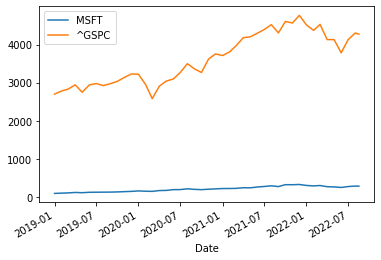

In [ ]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [ ]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

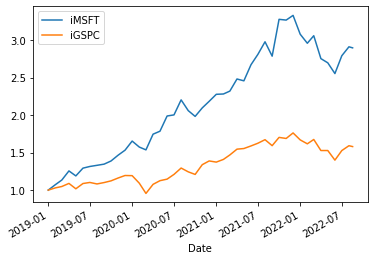

In [ ]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [ ]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [ ]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 432x288 with 0 Axes>

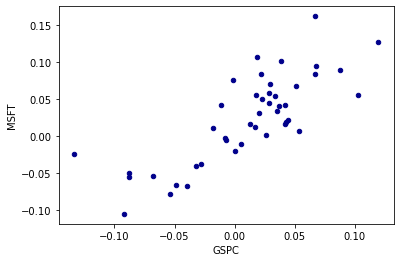

In [ ]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

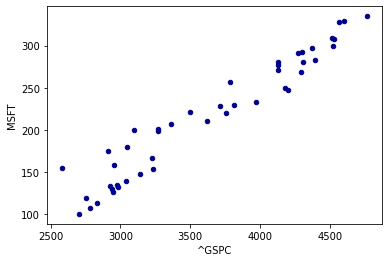

In [ ]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

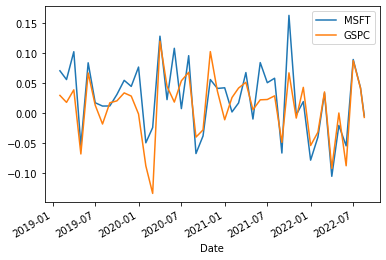

In [ ]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

In [ ]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002475592880573198

In [ ]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00348984, 0.00247559],
       [0.00247559, 0.00279655]])

In [ ]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7924378192291807

In [ ]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7924378192291808, 1.4639712521227075e-10)